# WeatherPy
----

#### Analysis
* Observation 1: Cities located closest to the Equator (zero latitude) had the highest temperature.  According to the plot, currently the hottest cities are located 20 degrees north of the Equator.  They are most likely in their summer season yet.
* Observation 2: The plots for Lattitude vs Cloudiness/Humidity did not show any direct correlation as points were not very consistent like the temperature plot.  Showing Wind Speed/Humidity vs Lattitude AND Longitude would provide a better visualization then just vs Lattitude alone.  Geographic location would play a large part in a possible determination as to why one city is windier, or more humid, than another.
* Observation 3: For wind speed, a majority of the cities plotted don't show a direct correlation between lattitude and speed.  As previously mentioned, a plot that includes both lattitude and longitude would give us a better visualization with speed and what part of the world the city is located in.  Geographic considerations also apply.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
# URL for api call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# # Testing
# test_url = f"{url}appid={api_key}&units={units}&q=" #need units for proper temperature in F
# # test_url = f"{url}appid={api_key}&q=" #without units
# response = requests.get(test_url + "Chula Vista").json()
# response

main_url = f"{url}appid={api_key}&units={units}&q="

In [26]:
# Lists creation
name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Call counters
record = 0
max_calls = 50 # setting max call limit
sets = 1

# Retrieval print statement
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

# Loop to gather required info from cities
# Adding Try statement to skip city where no data is found
for city in cities:
    
    # Making sure we don't reach call limit as stated in API docs
    if record == max_calls:
        time.sleep(60)
        sets +=1
        record = 0
    
    print(f"Processing Record {record} of Set {sets} | {city}")
    
    try:
        response = requests.get(main_url + city).json()
        name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
    except:
        print("City not found. Skipping...")

    record +=1

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | busselton
Processing Record 1 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | acapetahua
City not found. Skipping...
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | mount gambier
Processing Record 11 of Set 1 | vao
Processing Record 12 of Set 1 | bambous virieux
Processing Record 13 of Set 1 | upington
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | reshetylivka
Processing Reco

Processing Record 31 of Set 4 | zanesville
Processing Record 32 of Set 4 | ribeira grande
Processing Record 33 of Set 4 | bethel
Processing Record 34 of Set 4 | chute-aux-outardes
Processing Record 35 of Set 4 | lasa
Processing Record 36 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 37 of Set 4 | flinders
Processing Record 38 of Set 4 | mobaye
Processing Record 39 of Set 4 | tsiroanomandidy
Processing Record 40 of Set 4 | hare bay
Processing Record 41 of Set 4 | urdzhar
City not found. Skipping...
Processing Record 42 of Set 4 | krasnyy chikoy
Processing Record 43 of Set 4 | pangody
Processing Record 44 of Set 4 | omsukchan
Processing Record 45 of Set 4 | ende
Processing Record 46 of Set 4 | mezen
Processing Record 47 of Set 4 | port hardy
Processing Record 48 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 49 of Set 4 | narrabri
Processing Record 0 of Set 5 | inderborskiy
City not found. Skipping...
Processing Record 1 of Set 5 | nar

Processing Record 18 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 19 of Set 8 | hemsedal
Processing Record 20 of Set 8 | satitoa
City not found. Skipping...
Processing Record 21 of Set 8 | hovd
Processing Record 22 of Set 8 | port blair
Processing Record 23 of Set 8 | northam
Processing Record 24 of Set 8 | asosa
Processing Record 25 of Set 8 | chocope
Processing Record 26 of Set 8 | georgetown
Processing Record 27 of Set 8 | kodinsk
Processing Record 28 of Set 8 | kommunar
Processing Record 29 of Set 8 | padang
Processing Record 30 of Set 8 | smolenka
Processing Record 31 of Set 8 | salmon arm
Processing Record 32 of Set 8 | manoel urbano
Processing Record 33 of Set 8 | kamenka
Processing Record 34 of Set 8 | zhob
Processing Record 35 of Set 8 | lulea
Processing Record 36 of Set 8 | vilhena
Processing Record 37 of Set 8 | ridgecrest
Processing Record 38 of Set 8 | belyy yar
Processing Record 39 of Set 8 | samarinda
Processing Record 40 of Set 8 | maniitsoq
Proce

Processing Record 3 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 4 of Set 12 | arlit
Processing Record 5 of Set 12 | mugur-aksy
Processing Record 6 of Set 12 | verkhnevilyuysk
Processing Record 7 of Set 12 | wenling
Processing Record 8 of Set 12 | fort-shevchenko
Processing Record 9 of Set 12 | tabialan
City not found. Skipping...
Processing Record 10 of Set 12 | halalo
City not found. Skipping...
Processing Record 11 of Set 12 | rocha
Processing Record 12 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 13 of Set 12 | ust-tarka
Processing Record 14 of Set 12 | santa isabel do rio negro
Processing Record 15 of Set 12 | olonets
Processing Record 16 of Set 12 | damaturu
Processing Record 17 of Set 12 | kano
Processing Record 18 of Set 12 | ilulissat
Processing Record 19 of Set 12 | aksu
Processing Record 20 of Set 12 | chagda
City not found. Skipping...
Processing Record 21 of Set 12 | gardner
Processing Record 22 of Set 12 | namibe
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
# Converting data into dataframe
city_dict = {"Cities": name,
               "Cloudiness": cloudiness,
               "Country": country,
               "Date": date,
               "Humidity": humidity,
               "Lat": lat,
              "Lon": lng,
              "Max Temp": max_temp,
              "Wind Speed": wind_speed}

cities_df = pd.DataFrame(city_dict)
cities_df.count()

Cities        551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lon           551
Max Temp      551
Wind Speed    551
dtype: int64

In [29]:
cities_df.head()

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Busselton,0,AU,1559024353,34,-33.64,115.35,69.01,12.86
1,Hilo,90,US,1559024354,74,19.71,-155.08,78.80,8.05
2,Albany,40,US,1559024355,71,42.65,-73.75,57.00,3.36
3,Ushuaia,46,AR,1559024356,86,-54.81,-68.31,21.86,4.81
4,Port Alfred,100,ZA,1559024356,92,-33.59,26.89,58.22,8.52


In [31]:
cities_df.to_csv("Output_Data/cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

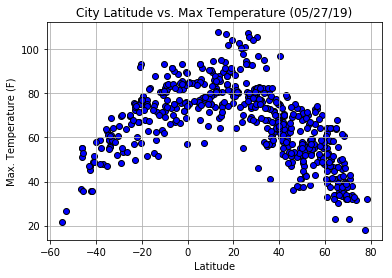

In [47]:
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs. Max Temperature (05/27/19)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output_Data/Latitude_vs_Temp_Plot.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

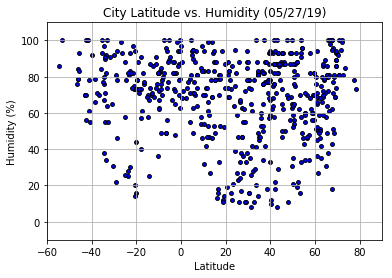

In [62]:
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o", facecolors="blue", edgecolors="black", s=15)

plt.title("City Latitude vs. Humidity (05/27/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-60, 90)
plt.ylim(-10, 110)
plt.grid(True)

plt.savefig("Output_Data/Latitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

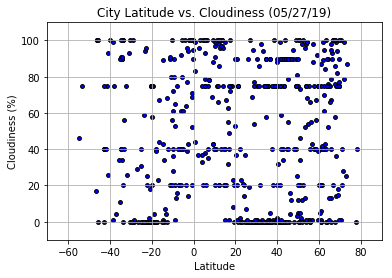

In [63]:
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", s=15)

plt.title("City Latitude vs. Cloudiness (05/27/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(-70, 90)
plt.ylim(-10, 110)
plt.grid(True)

plt.savefig("Output_Data/Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

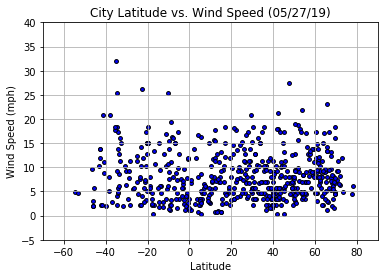

In [64]:
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black", s=15)

plt.title("City Latitude vs. Wind Speed (05/27/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-70, 90)
plt.ylim(-5, 40)
plt.grid(True)

plt.savefig("Output_Data/Latitude_vs_Wind_Speed.png")

# Show plot
plt.show()